In [2]:
# a. Import the necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt


In [3]:
# b. Load the training and testing data from the directory
# Paths to train and test directories
train_dir = './mnist-jpg/train'
test_dir = './mnist-jpg/test'


In [4]:
# Load images with Keras
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)


Found 60000 files belonging to 10 classes.


In [5]:
test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)


Found 10000 files belonging to 10 classes.


In [6]:
# Normalize images to the range [0, 1]
def normalize_images(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)


In [7]:
# c. Define the network architecture using Keras
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),   # Flatten input images (28x28 pixels) into a 1D vector
    Dense(128, activation='relu'),      # Hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),       # Hidden layer with 64 units and ReLU activation
    Dense(10, activation='softmax')     # Output layer with 10 units (one for each class) and softmax activation
])

C:\Users\Alok\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
# d. Train the model using SGD
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8382 - loss: 0.5248 - val_accuracy: 0.9555 - val_loss: 0.1486
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9587 - loss: 0.1399 - val_accuracy: 0.9672 - val_loss: 0.1086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9725 - loss: 0.0921 - val_accuracy: 0.9672 - val_loss: 0.1066
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9780 - loss: 0.0696 - val_accuracy: 0.9718 - val_loss: 0.0930
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9831 - loss: 0.0531 - val_accuracy: 0.9702 - val_loss: 0.0989
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9863 - loss: 0.0431 - val_accuracy: 0.9751 - val_loss: 0.0802
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9744 - val_loss: 0.0858
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9910 - loss: 0

In [10]:
# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9767 - loss: 0.0960
Test Loss: 0.0837
Test Accuracy: 0.9778


In [15]:
# f. Plot the training loss and accuracy
# Extract loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

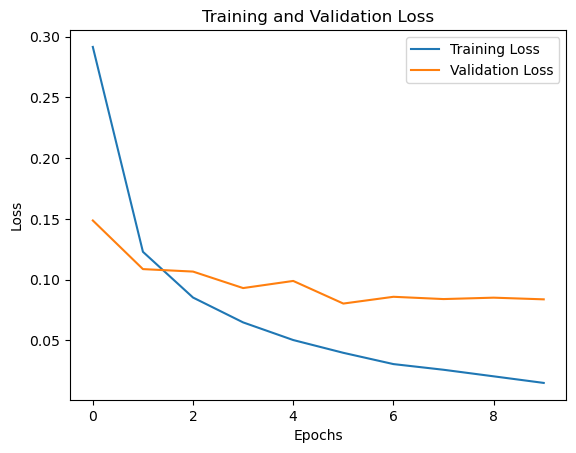

In [16]:
# Plot training and validation loss
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

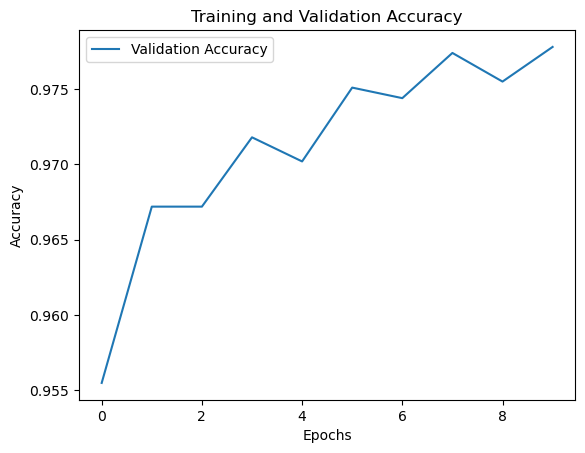

In [17]:
# Plot training and validation accuracy
plt.plot(val_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


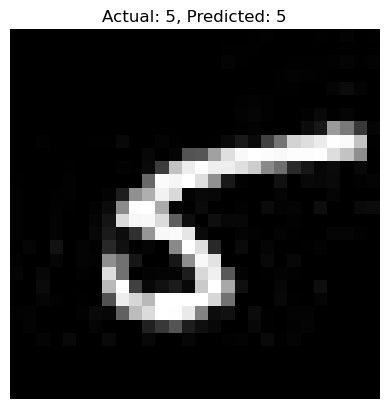

In [22]:
import random
# Take a batch of images and labels from the test dataset
images, labels = next(iter(test_dataset))
idx = random.randint(0, len(images) - 1)  # Choose a random index in the batch

img = images[idx]
actual_label = labels[idx].numpy()  # Convert label tensor to numpy for display
prediction = model.predict(tf.expand_dims(img, axis=0))  # Predict for a single image

# Get the predicted label (index of the highest score)
predicted_label = np.argmax(prediction, axis=1)[0]

# Display the image along with actual and predicted labels
plt.imshow(img.numpy().squeeze(), cmap="gray")
plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
plt.axis("off")
plt.show()